------ Chapter 12 of MLAPP: Generalized Linear Models ------

@author Zijie ZHONG / Zigit CHUNG

@date 5 nov 2021

In this demo I will try to re-obtain some distributions by modifying the parameters in the general formula for the Exponential Family Models. 

List : Bernoulli, Binomial, Poisson, Exponential, Normal 

In every block of code, I re-define the formula of the functions, but the rest of the codes are just duplicated each time. I have to do in this way because what changes in the general exponential family formula is not the value of some parameters, but the form of the functions in the formula. I didn't find another efficient way to modify the form of the functions.

[Reference](https://en.wikipedia.org/wiki/Exponential_family)

Bernoulli

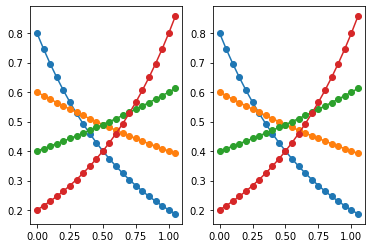

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the formula
x = np.arange(0,1.1,0.05)
h = 1
T = x
def eta(theta):
    return np.log(theta/(1-theta))
def A(eta):
    return np.log(1+np.exp(eta))

# plot the pdf generated 2 ways 
fig, ax = plt.subplots(1, 2)
for p in np.arange(0.2,0.8,0.2):
    # FEF
    pdf = h * np.exp(np.dot(eta(p),x)-A(eta(p)))
    ax[0].plot(x,pdf,'-o')
    ## original form
    pdf2 = p**x*(1-p)**(1-x)
    ax[1].plot(x,pdf2,'-o')
plt.show()

Binomial with time of trials (n) = 50 

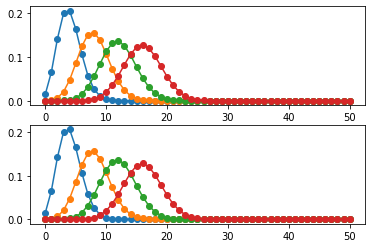

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Definition of the formula
x_set = np.arange(0,51,1)
n = 40
def h(n,x):
    return m.comb(n,x)
def T(x):
    return x
def eta(theta):
    return np.log(theta/(1-theta))
def A(eta):
    return n*np.log(1+np.exp(eta))


pdf = np.zeros(51)
pdf2 = np.zeros(51)
# plot the pdf generated 2 ways 
fig, ax = plt.subplots(2, 1)
for p in np.arange(0.1,0.5,0.1):
    for x in x_set:
        # FEF
        pdf[x] = np.dot(h(n,x),   np.exp(  np.dot(eta(p),x)  -  A(eta(p))   )   )
        ## original form
        pdf2[x] = m.comb(n,x)*(p**x)*(1-p)**(n-x)
    ax[0].plot(x_set,pdf,'o-')
    ax[1].plot(x_set,pdf2,'o-')
plt.show()

Poisson

Notes: The result generated with 2 methods are slightly different. When calculated with the standard formula (second figure), the data is rounded to 0 from the 18th point.

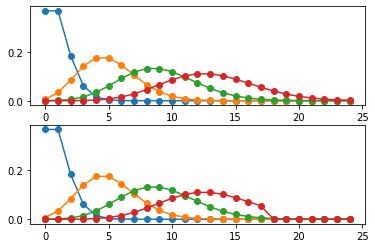

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Definition of the formula
x_set_len = 25
x_set = np.arange(0,x_set_len,1)
# to keep the convention, we replace the \lambda in the formula by p
n = 40
def h(x):
    return 1/(m.factorial(x))
def T(x):
    return x
def eta(theta):
    return np.log(theta)
def A(eta):
    return np.exp(eta)


pdf = np.zeros(x_set_len)
pdf2 = np.zeros(x_set_len)
# plot the pdf generated 2 ways 
fig, ax = plt.subplots(2, 1)
for p in np.arange(1,16,4):
    for x in x_set:
        # FEF
        pdf[x] = np.dot(h(x),   np.exp(  np.dot(eta(p),x)  -  A(eta(p))   )   )
        ## original form
        pdf2[x] = (p**x*np.exp(-p))/(m.factorial(x))
    ax[0].plot(x_set,pdf,'o-')
    ax[1].plot(x_set,pdf2,'o-')
plt.show()

Exponential

/var/folders/zw/ng53bbgn3wx2787y975_95s00000gn/T/ipykernel_44556/3330254785.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.log(-eta)


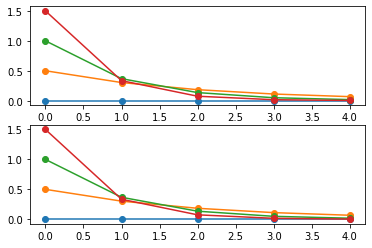

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Definition of the formula
x_set_len = 5
x_set = np.arange(0,x_set_len,1)
# to keep the convention, we replace the \lambda in the formula by p
n = 40
def h(x):
    return 1
def T(x):
    return x
def eta(theta):
    return -p
def A(eta):
    return -np.log(-eta)


pdf = np.zeros(x_set_len)
pdf2 = np.zeros(x_set_len)
# plot the pdf generated 2 ways 
fig, ax = plt.subplots(2, 1)
for p in np.arange(0,2,0.5):
    for x in x_set:
        # FEF
        pdf[x] = np.dot(h(x),   np.exp(  np.dot(eta(p),x)  -  A(eta(p))   )   )
        ## original form
        pdf2[x] = p * np.exp(-p*x)
    ax[0].plot(x_set,pdf,'-o')
    ax[1].plot(x_set,pdf2,'-o')
plt.show()

Normal

For this part I reuse the code of my 1st version of demo. The principal is the same even though the code might seem a big different. 

I will rewrite the code in a similar structure in the file GLM_general.ipynb. I did so because the 1st example given in GLM_general.ipynb is the linear regression model. If everything goes write, we should get a pdf of Normal Distribution at the end of that part, because that's part of the hypothesis adopted by the linear regression model.

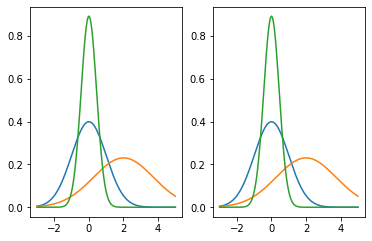

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

# Plot different Univariate Normals
x = np.linspace(-3, 5, num=150)
fig, axs = plt.subplots(1, 2)
# FFE
sigma = 1
mu = 0
Z = np.sqrt(2*np.pi)*np.exp((mu**2)/(2*sigma**2))
N = (1/Z) * np.exp( mu/(sigma**2)*x+ (-1/(2*sigma**2))*x**2)
axs[0].plot(x,N)

sigma = np.sqrt(3)
mu = 2
Z = np.sqrt(2*np.pi)*sigma*np.exp((mu**2)/(2*sigma**2))
N = (1/Z) * np.exp( mu/(sigma**2)*x+ (-1/(2*sigma**2))*x**2)
axs[0].plot(x,N)

sigma = np.sqrt(0.2)
mu = 0
Z = np.sqrt(2*np.pi)*sigma*np.exp((mu**2)/(2*sigma**2))
N = (1/Z) * np.exp( mu/(sigma**2)*x+ (-1/(2*sigma**2))*x**2)
axs[0].plot(x,N)
# original form
axs[1].plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$N(0, 1)$",)
axs[1].plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$n(2, 3)$")
axs[1].plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$n(0, 0.2)$")
fig.subplots_adjust(bottom=0.15)

plt.show()